# Probabilities of Events in Stocks with Risks and and Return

For machine learning and deep learning, probability is important to learn and understand. 

In [1]:
# Library
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
stock_name = 'AAPL'
start = '2018-01-01' 
end = '2019-01-01'
df = yf.download(stock_name, start, end)
df = df.reset_index()

[*********************100%***********************]  1 of 1 downloaded


In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,170.160004,172.300003,169.259995,172.259995,168.987320,25555900
1,2018-01-03,172.529999,174.550003,171.960007,172.229996,168.957886,29517900
2,2018-01-04,172.539993,173.470001,172.080002,173.029999,169.742706,22434600
3,2018-01-05,173.440002,175.369995,173.050003,175.000000,171.675278,23660000
4,2018-01-08,174.350006,175.610001,173.929993,174.350006,171.037628,20567800


In [4]:
rets = df['Adj Close'].pct_change().dropna()
rets.head()

1   -0.000174
2    0.004645
3    0.011385
4   -0.003714
5   -0.000115
Name: Adj Close, dtype: float64

In [5]:
Positive = [x for x in rets if x >= 0]
Positive 

[0.004645062853118276,
 0.011385302176106338,
 0.005680185070940924,
 0.01032637688858662,
 0.016516209809796845,
 0.0008933086700184667,
 0.00022593650005453547,
 0.0023376442349785087,
 0.00275490819060642,
 0.002090446970163695,
 0.04179154076879055,
 0.012231496255121321,
 0.04027873964320405,
 0.010017778672159805,
 0.018437319086991977,
 0.03357838015548387,
 0.008359069294464838,
 0.017391295238289084,
 0.019772166121068357,
 0.006914358348526939,
 0.003461745204928812,
 0.010912389488991536,
 0.017180943808731808,
 0.00966771204944239,
 0.0011768533817844151,
 0.047471966381662734,
 0.0078087483725906015,
 0.01025911145040248,
 0.01912239139466898,
 0.006934224074965689,
 0.0099179869818804,
 0.018817928649396576,
 0.009858400311298698,
 0.003388138598183099,
 0.006238211413460926,
 0.01376404770442674,
 0.004357370433198282,
 0.0034831132020165523,
 0.018112284744737694,
 0.023236140102975922,
 0.04417512206515806,
 0.0018122237862276958,
 0.03923341433915395,
 0.0072349034437

In [6]:
len(Positive)

128

In [7]:
Negative = [x for x in rets if x <= 0]
Negative

[-0.00017417874903269404,
 -0.003714279699608136,
 -0.00011472914018662017,
 -0.00022947876160750447,
 -0.005082090074120416,
 -0.0044627275050476145,
 -0.008181131441761247,
 -0.015928659185317384,
 -0.017851018500488647,
 -0.020698435621005484,
 -0.005894166556026814,
 -0.04339016474134738,
 -0.02498427047772933,
 -0.021407078052592565,
 -0.02751649918191268,
 -0.003237206503909129,
 -0.0033637031067932366,
 -0.004538806817489527,
 -0.0032407000738997604,
 -0.0015136836889383387,
 -0.017516237394228806,
 -0.0008483249811734872,
 -0.00928284337059504,
 -0.009630216674637482,
 -0.008501401190699198,
 -0.003526410077728026,
 -0.015279072134138039,
 -0.000342345223522722,
 -0.022654680173382014,
 -0.014129707480310727,
 -0.023156702989311606,
 -0.02564111438636152,
 -0.011049095652676644,
 -0.006556172256882542,
 -0.02557857286857257,
 -0.004675242770705079,
 -0.002244236404391642,
 -0.028340053191079018,
 -0.04097226663678033,
 -0.002896405591983342,
 -0.013919057331441498,
 -0.01156986

In [8]:
len(Negative)

122

In [9]:
Neutral = [ x if x in Negative else 0 for x in range(1,128)]
Neutral

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [10]:
# Each needs same lengths
Positive = Positive[:100] 
Negative = Negative[:100]
Neutral = Neutral[:100]

In [11]:
Markov_Models = pd.DataFrame({'Bear': Negative,'Bull': Positive, 'Neutral':Neutral})
Markov_Models

,Bear,Bull,Neutral
0,-0.000174,0.004645,0
1,-0.003714,0.011385,0
2,-0.000115,0.005680,0
3,-0.000229,0.010326,0
4,-0.005082,0.016516,0
5,-0.004463,0.000893,0
6,-0.008181,0.000226,0
7,-0.015929,0.002338,0
8,-0.017851,0.002755,0
9,-0.020698,0.002090,0


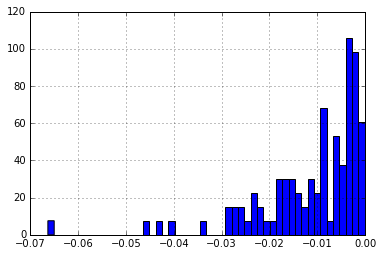

In [12]:
plt.hist(Negative, 50, normed=True)
plt.grid()
plt.show()

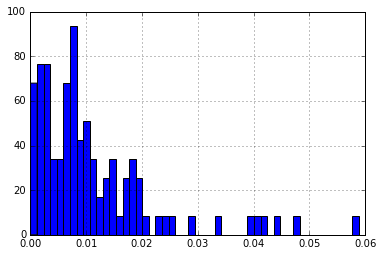

In [13]:
plt.hist(Positive, 50, normed=True)
plt.grid()
plt.show()

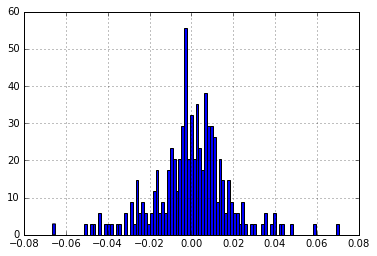

In [14]:
plt.hist(rets, 100, normed=True)
plt.grid()
plt.show()

In [15]:
from scipy.stats import binom
n = 5 # number of stocks 
p = 0.7 # Selecting a stock above 5% returns is 0.70
k = 2 # Picking stocks above 5% returns
binomial = binom.pmf(k, n, p)
binomial

0.1323

In [16]:
# Standard Normal Distribution
from scipy.stats import norm
norm.cdf(rets)

array([ 0.49993051,  0.50185311,  0.50454198,  0.49851822,  0.49995423,
        0.49990845,  0.50226605,  0.50411956,  0.49797255,  0.50658871,
        0.50035638,  0.49821964,  0.49673624,  0.50009014,  0.49364565,
        0.49287885,  0.50093258,  0.49174311,  0.49764858,  0.50109905,
        0.50083397,  0.48269526,  0.49003376,  0.51666756,  0.49146046,
        0.48902389,  0.50487954,  0.51606455,  0.50399645,  0.50735501,
        0.51339332,  0.49870854,  0.49865808,  0.49818928,  0.50333475,
        0.50693777,  0.50788744,  0.49870715,  0.49939613,  0.49301239,
        0.50275841,  0.50138103,  0.49966157,  0.49629673,  0.50435333,
        0.50685387,  0.5038568 ,  0.49615816,  0.49660847,  0.5004695 ,
        0.49859317,  0.49390477,  0.49986342,  0.49096286,  0.49436325,
        0.49076264,  0.51893146,  0.4897718 ,  0.49559214,  0.50311521,
        0.49738448,  0.50409272,  0.50762827,  0.50276633,  0.48979674,
        0.50395664,  0.50750682,  0.49813485,  0.50393287,  0.50

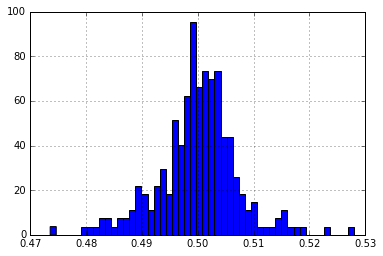

In [17]:
plt.hist(norm.cdf(rets), 50, normed=True)
plt.grid()
plt.show()